In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/laptops_train.csv")

In [3]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7   Storage                   977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [5]:
df.isna().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
Storage                       0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [6]:
mode_value=df['Operating System Version'].mode()[0]

In [7]:
df['Operating System Version'].fillna(mode_value, inplace=True)

In [8]:
df.isnull().sum()

Manufacturer                0
Model Name                  0
Category                    0
Screen Size                 0
Screen                      0
CPU                         0
RAM                         0
Storage                     0
GPU                         0
Operating System            0
Operating System Version    0
Weight                      0
Price                       0
dtype: int64

In [9]:
X=df.drop("Price",axis=1)

In [10]:
y=df["Price"]

In [11]:
# Convert categorical variables to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
X = pd.concat([X.drop(X_categorical.columns, axis=1), X_categorical], axis=1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [23]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # No activation function for the output layer (linear activation for regression)
])


In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)


loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Loss:", loss)

Epoch 1/100
25/25 [==============================] - 3s 4ms/step - loss: 142744177606656.0000
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 142744144052224.0000
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 142744076943360.0000
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 142743942725632.0000
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 142743724621824.0000
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 142743405854720.0000
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 142742885761024.0000
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 142742197895168.0000
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 142741174484992.0000
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 142739882639360.0000
Epoch 11/100
25/25 [==============================] - 0s 3m

In [25]:
predictions = model.predict(X_test_scaled)


7/7 [==============================] - 0s 2ms/step


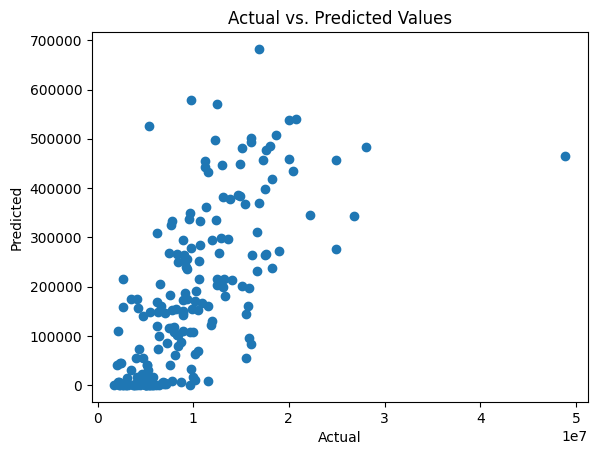

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()